In [1]:
from pynq import Overlay
from pynq import MMIO
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


def tc_to_dec(data, digit=32):
    bin_data = "{0:b}".format(data)
    while len(bin_data)<digit :
        bin_data = '0'+bin_data
    if bin_data[0] == '0':
        return int(bin_data,2)
    else:
        return -1 * (int(''.join('1' if x == '0' else '0' for x in bin_data), 2) + 1)

In [2]:
file_name = 'input.dat'
fir_input_array = np.loadtxt(file_name, dtype=np.int32)


fir_input = np.array([], dtype=np.int32)
fir_output = np.array([], dtype=np.int32)


ol = Overlay("/home/xilinx/jupyter_notebooks/fir_demo/fir11_demo.bit")
ol.download()

fir11_ip=MMIO(0x43C00000, 0x10000)


for input_i in fir_input_array:
    fir_input_i = int(input_i)
    
    fir11_ip.write(0x18, fir_input_i)
    print("input:", fir_input_i)
    
    fir11_ip.write(0x00, 1)
    
    fir_output_i = tc_to_dec(fir11_ip.read(0x10))
    print("output:", fir_output_i)
    
    fir_input = np.append(fir_input, fir_input_i)
    fir_output = np.append(fir_output, fir_output_i)
    

input: 100
output: 5300
input: -2
output: -106
input: -100
output: -14400
input: 13
output: 871
input: 97
output: 45541
input: -36
output: 46283
input: -86
output: -14385
input: 66
output: -39783
input: 59
output: 7414
input: -93
output: 30548
input: -10
output: -6056
input: 98
output: -21242
input: -52
output: 8576
input: -61
output: 12863
input: 97
output: -8323
input: -17
output: -6699
input: -81
output: 6547
input: 90
output: 3859
input: -6
output: -5325
input: -82
output: -2297
input: 92
output: 6132
input: -21
output: -557
input: -66
output: -5684
input: 100
output: 5029
input: -59
output: 1309
input: -22
output: -5596
input: 86
output: 3818
input: -97
output: 820
input: 52
output: -2885
input: 18
output: 2260
input: -77
output: -480
input: 100
output: -798
input: -81
output: -721
input: 32
output: 1171
input: 25
output: -1082
input: -72
output: -633
input: 97
output: 3238
input: -97
output: -4552
input: 75
output: 3383
input: -40
output: -1459
input: 0
output: -1349
input: 37
ou

output: 97596
input: 86
output: 24818
input: 97
output: -66820
input: 52
output: -102885
input: -18
output: -61260
input: -77
output: 21520
input: -100
output: 86798
input: -81
output: 96279
input: -32
output: 50829
input: 25
output: -19082
input: 72
output: -76367
input: 97
output: -96762
input: 97
output: -76448
input: 75
output: -28617
input: 40
output: 26459
input: 0
output: 70651
input: -37
output: 93408
input: -66
output: 92270
input: -87
output: 70889
input: -97
output: 36838
input: -100
output: -1455
input: -97
output: -37156
input: -90
output: -65981
input: -81
output: -86010
input: -72
output: -97170
input: -63
output: -100684
input: -57
output: -98483
input: -52
output: -92408
input: -50
output: -84180
input: -51
output: -75357
input: -54
output: -67299
input: -59
output: -60751
input: -66
output: -56293
input: -75
output: -54405
input: -84
output: -55127
input: -92
output: -58088
input: -98
output: -63081
input: -100
output: -69985
input: -95
output: -78303
input: -81
outpu

/usr/lib/python3/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


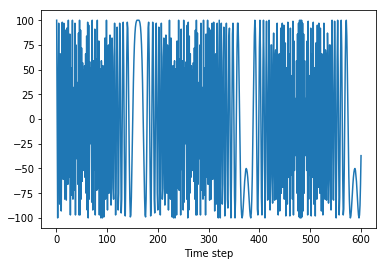

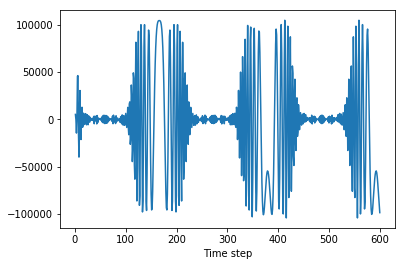

In [3]:
time_len = np.linspace(1, len(fir_output), len(fir_output))


f = plt.figure(1)
plt.plot(time_len, fir_input)
plt.xlabel('Time step')
f.show()

g = plt.figure(2)
plt.plot(time_len, fir_output)
plt.xlabel('Time step')
g.show()